# 雙樣本假設檢定
### 畢紘愷、李元靖
---

# 前言
下圖提供讀者參考兩獨立母體期望值 $\mu$ 之假設檢定的一種方法。
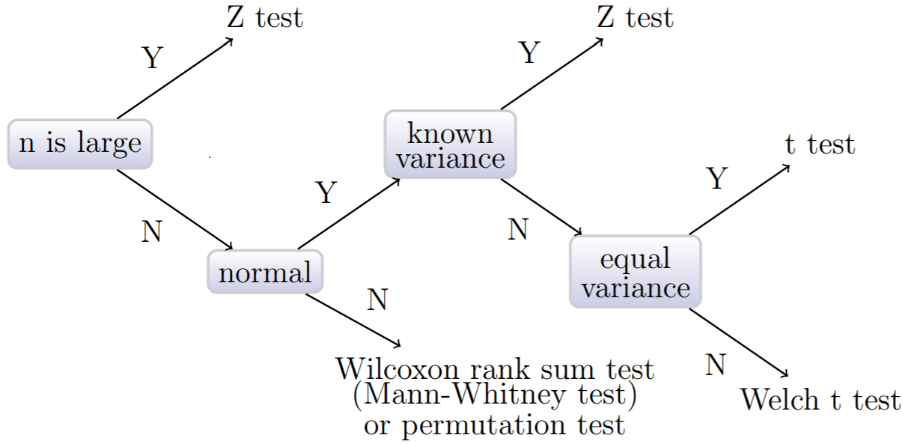

```
注意 : 上圖我們僅提供一種可行的方案。
舉例來說， Wilcoxon rank sum test 並不需假設其母體為常態分布，有常態分佈假設或大樣本時亦可使用。
我們鼓勵讀者去熟悉各種檢定方法的假設並活用之，不一定要按照上圖的方法去執行。
```

# 整齊的資料
如何整理資料是我們必須學習的一個課題，常用的表格有寬表格與長表格兩種 :

+ **寬表格的特性是每增加一行即增加一個變數**
+ **長表格的特性是每增加一列即增加一個觀察值**

## 輸入成對樣本
在輸入成對樣本時我們採用寬表格。輸入型如入下圖的資料。
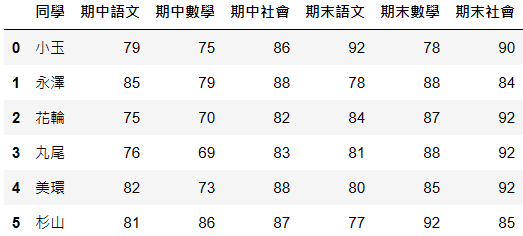

## 輸入獨立樣本
在輸入獨立樣本時我們採用長表格。輸入型如入下圖的資料。

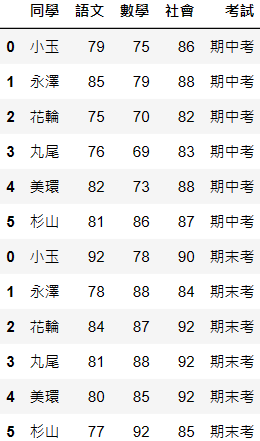

+ **更詳細的資訊請參考 [1] 和 [2] 或是 5_資料整理基礎**

# 兩群平均數差異之假設檢定


In [1]:
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.stats.weightstats as stests
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

## Z檢定
+ Step1 : 輸入兩筆資料(分開的)，以下範例為資料集 sample3 中僅含一變數 rate3，資料集 sample4 中僅含一變數 rate4，<br>且我們已知他們的常態母體變異數分別為 0.2245562 和 0.2503402。

In [2]:
sample3 = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\11_假說檢定\11b_two-sample-test-data\two-sample-test\sample3.CSV", names=["rate3"])
sample3

,rate3
0,1.094118
1,0.716561
2,1.153846
3,1.951852
4,0.571429
5,1.864969
6,0.661786
7,2.141531
8,1.278766
9,1.442623


In [3]:
sample4 = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\11_假說檢定\11b_two-sample-test-data\two-sample-test\sample4.CSV", names=["rate4"])
sample4

,rate4
0,1.072319
1,0.564498
2,0.843096
3,0.961789
4,0.626806
5,0.908007
6,1.456757
7,1.469214
8,1.174098
9,0.774823


+ Step2 : 輸入以下指令，Python 並沒有處理已知母體變異數的檢定函式，所以只能自己寫

+ 已知他們的常態母體變異數分別為 0.2245562 和 0.2503402

In [4]:
sample3_var = 0.2245562
sample4_var = 0.2503402
n1 = len(sample3)
n2 = len(sample4)

#### 統計量
$$Z = \frac{\bar X_{1} - \bar X_{2} - (\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

In [5]:
(np.mean(sample3['rate3']) - np.mean(sample4['rate4']) - 0)/(sample3_var/n1 + sample4_var/n2)**0.5

0.3244676519305671

#### p value

In [6]:
p_value = 1 - stats.norm.cdf(0.3244676519305671)
p_value

0.372792004332009

#### 95% 信賴區間
$$[\; (\bar X_{1} - \bar X_{2}) - z_{0.025} \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}, \;(\bar X_{1} - \bar X_{2}) + z_{0.025} \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}} \;]$$

+ $Z_{\frac{0.05}{2}}$

In [7]:
z = norm.ppf(1 - 0.05/2)
sd = (sample3_var/n1 + sample4_var/n2)**0.5

In [8]:
ci = [np.mean(sample3['rate3']) - np.mean(sample4['rate4'])-z*sd,
      np.mean(sample3['rate3']) - np.mean(sample4['rate4'])+z*sd]
ci

[-0.21528326752281418, 0.30070376638949864]

```
T 統計量： 0.3244676519305671
P 值： 0.372792004332009
95% 信賴區間： (-0.21528326752281418, 0.30070376638949864)

因為 0 ∈ (-0.21528326752281418, 0.30070376638949864)，μ1−μ2 的 95% 信賴區間，所以我們不拒絕 H0
```

#### 討論說明
**假設** : 母體皆為常態分布，母體變異數皆已知，大樣本時可以樣本變異數代替母體變異數

**檢定統計量**: $$Z = \frac{\bar X_{1} - \bar X_{2}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} \sim N(0,1),\;under\;H_0$$

我們一般會藉由 Q-Q plot 評估樣本是否為常態分布，若觀察值幾乎都落在合理範圍內(接近成一條斜直線)，<br>
那麼我們會主觀上的認定樣本不違反常態假設。以下示範如何繪製 Q-Q plot。

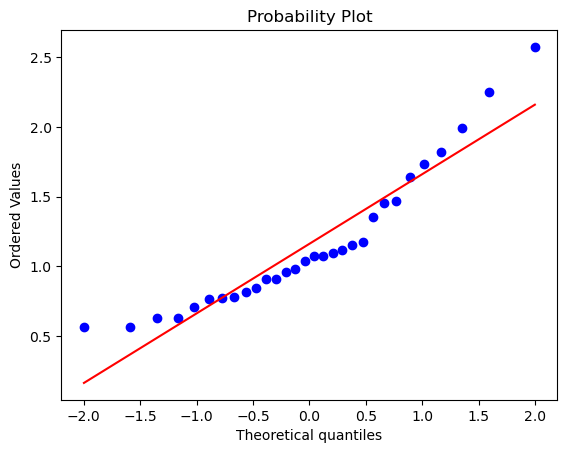

In [9]:
# import matplotlib.pyplot as plt

stats.probplot(sample4["rate4"], sparams=(0,1), dist="norm", fit = True , plot = plt)
plt.show()

#### **Quantile-Quantile Plot (分位圖)：兩組數據各自排序比較分佈是否相同的方法**

+ [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)
+ array 1 理論值 ；array 2 樣本分位數(排序) 
+ sparams : 特定於分佈的參數 (有母數 樣本)
+ dist : 沒打的話會預設 normal (理論值)
+ 如果 fit 為 True（默認），則將最小二乘回歸（最佳擬合）線擬合到樣本數據
+ 如果呈現一直線，該數據就是常態分佈。

## 成對樣本 $\mu_1=\mu_2$ 檢定
+ Step1：準備兩筆常態分佈的資料，合併成寬表格形成成對樣本並設定資料名稱 'MergedNorm'

In [10]:
# 設置隨機種子，以確保可複現性
np.random.seed(123)

# 生成 NormalSample1
mean1 = 30
std1 = 2.1
sample_size = 50
normal_sample1 = np.random.normal(mean1, std1, sample_size)

# 生成 NormalSample2
mean2 = 25
std2 = 0.8
normal_sample2 = np.random.normal(mean2, std2, sample_size)

# 寬表格形式
MergedNorm = pd.DataFrame({'NormalSample1': normal_sample1, 'NormalSample2': normal_sample2})
MergedNorm.head()

,NormalSample1,NormalSample2
0,27.720176,23.964732
1,32.094425,24.168969
2,30.594255,26.394970
3,26.836781,24.361550
4,28.784939,25.023747


+ Step2：進行 T-test，設定單尾或雙尾檢定並調整 $\alpha$ 值

1. 雙尾檢定 $\alpha = 0.05$

In [11]:
result = stats.ttest_rel(normal_sample1, normal_sample2)

# 樣本差異、樣本差異均值、樣本差異標準差、樣本大小
diff = normal_sample1 - normal_sample2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
n = len(diff)

# 95% 信賴區間
t_critical = stats.t.ppf(0.975, df=n-1)
ci_lower = mean_diff - t_critical * (std_diff / np.sqrt(n))
ci_upper = mean_diff + t_critical * (std_diff / np.sqrt(n))

# 输出结果
print("T 統計量：", result.statistic)
print("P 值：", result.pvalue)
print("95% 信賴區間：[", ci_lower, ",", ci_upper, "]")

T 統計量： 12.917865217286227
P 值： 2.138442762376285e-17
95% 信賴區間：[ 4.218045047884999 , 5.7721802752318006 ]


可知檢定結果 :
1. **p-value 判別法** : p-value = 2.14e-17 < $\alpha = 0.05$，故拒絕 $H_0$

2. **信賴區間判別法** : $\mu_1-\mu_2$ = 0 ∉ (4.2180, 5.7722)，故拒絕 $H_0$

2. 單尾檢定 $\alpha = 0.05$

In [12]:
result = stats.ttest_rel(normal_sample1, normal_sample2, alternative='greater')

# 樣本差異、樣本差異均值、樣本差異標準差、樣本大小
diff = normal_sample1 - normal_sample2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
n = len(diff)

# 95% 信賴區間
t_critical = stats.t.ppf(0.95, df=n-1)
ci_lower = mean_diff - t_critical * (std_diff / np.sqrt(n))
ci_upper = float('inf')

# 输出结果
print("T 統計量：", result.statistic)
print("P 值：", result.pvalue)
print("95% 信賴區間：[", ci_lower, ",", ci_upper, "]")

T 統計量： 12.917865217286227
P 值： 1.0692213811881425e-17
95% 信賴區間：[ 4.346819739540494 , inf ]


可知檢定結果 :
1. **p-value 判別法** : p-value = 1.069e-17 < $\alpha = 0.05$，故拒絕 $H_0$

2. **信賴區間判別法** : $\mu_1-\mu_2$ = 0 ∉ (4.3468, inf)，故拒絕 $H_0$

## signed rank test & sign test
```
當成對樣本不確定是否均為常態分佈時，可以透過產生一個變數為兩個樣本的差異，
再針對該變數按先前一個樣本檢定的「中位數檢定」(Wilcoxon signed rank test) 或 “sign test” 進行比較。
```

### signed rank test

In [13]:
statistic, p_value = stats.wilcoxon(normal_sample1, normal_sample2)
print("統計量：", statistic)
print("P 值：", p_value)

統計量： 6.0
P 值： 2.4868995751603507e-14


### sign test
+ sum(sample1 > sample2) 表示有多少個樣本 1 大於樣本 2 的觀測值，n = len(sample1) 表示總的觀測數

In [14]:
p_value = stats.binom_test(sum(normal_sample1 > normal_sample2), n=len(normal_sample1))
print("P 值：", p_value)

P 值： 3.708322537931963e-11


由上可知，p-value 皆小於 0.05，故拒絕 $H_0$

## 獨立樣本 $\mu_1=\mu_2$ 檢定
+ **Step1**：將上述的成對樣本 'MergedNorm' 堆疊成獨立樣本長表格形式，並設定資料名稱 'StackedNorm'


+ value_vars = ['NormalSample1', 'NormalSample2'] 參數來指定需要堆疊的變量列
+ var_name = 'Sample' 參數用於指定堆疊後的變量名列
+ value_name = 'Value' 參數用於指定堆疊後的值列的列名

In [15]:
StackedNorm = pd.melt(MergedNorm, value_vars=['NormalSample1', 'NormalSample2'], var_name='Sample', value_name='Value')
StackedNorm

,Sample,Value
0,NormalSample1,27.720176
1,NormalSample1,32.094425
2,NormalSample1,30.594255
3,NormalSample1,26.836781
4,NormalSample1,28.784939
...,...,...
95,NormalSample2,25.824892
96,NormalSample2,24.132346
97,NormalSample2,23.909223
98,NormalSample2,25.303520


+ **Step2**：進行 T-test，設定單尾或雙尾檢定並調整 $\alpha$ 值，以及兩樣本的變異數是否相等

1. 變異數相等 $\alpha = 0.05$

In [16]:
result = stats.ttest_ind(StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value'],
                         StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value'],
                         equal_var=True)

print("T 統計量：", result.statistic)
print("P 值：", result.pvalue)

T 統計量： 13.24954714758578
P 值： 1.4268694915693042e-23


#### 95% 信賴區間

In [17]:
mean_diff = np.mean(StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value']) - np.mean(StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value'])
std_diff = np.sqrt((np.var(StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value']) + np.var(StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value'])) / 2)
n1 = len(StackedNorm[StackedNorm['Sample'] == 'NormalSample1'])
n2 = len(StackedNorm[StackedNorm['Sample'] == 'NormalSample2'])

t_critical = stats.t.ppf(0.975, df=n1+n2-2)
ci_lower = mean_diff - t_critical * std_diff * np.sqrt(1/n1 + 1/n2)
ci_upper = mean_diff + t_critical * std_diff * np.sqrt(1/n1 + 1/n2)
print("95% 信賴區間：[", ci_lower, ",", ci_upper, "]")

95% 信賴區間：[ 4.25448270925957 , 5.7357426138572265 ]


由上可知，$\mu_1 - \mu_2 = 0$ ∉ (4.25448270925957, 5.7357426138572265)，故拒絕 $H_0$

+ **註：變異數相等時，df = (n1−1) + (n2−1)，所以 df = 50−1+50−1 = 98**

2. 變異數未假設相等 $\alpha = 0.05$

In [18]:
result = stats.ttest_ind(StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value'],
                         StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value'],
                         equal_var=False)

print("T 統計量：", result.statistic)
print("P 值：", result.pvalue)

T 統計量： 13.24954714758578
P 值： 1.6823190198944733e-19


#### 95% 信賴區間

In [19]:
mean_diff = np.mean(StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value']) - np.mean(StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value'])
std1 = np.std(StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value'], ddof=1)  # N-1 作為分母，不偏樣本標準差
std2 = np.std(StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value'], ddof=1)
n1 = len(StackedNorm[StackedNorm['Sample'] == 'NormalSample1'])
n2 = len(StackedNorm[StackedNorm['Sample'] == 'NormalSample2'])

v = (std1**2/n1 + std2**2/n2)**2/(std1**4/((n1-1)*n1**2) + std2**4/((n2-1)*n2**2))

t_critical = stats.t.ppf(0.975, df=v)
ci_lower = mean_diff - t_critical * np.sqrt((std1**2/n1) + (std2**2/n2))
ci_upper = mean_diff + t_critical * np.sqrt((std1**2/n1) + (std2**2/n2))


print("95% 信賴區間：[", ci_lower, ",", ci_upper, "]")

95% 信賴區間：[ 4.241048966804224 , 5.749176356312572 ]


由上可知，$\mu_1 - \mu_2 = 0$ ∉ (4.241048966804224 , 5.749176356312572)，故拒絕 $H_0$

+ **註：兩樣本個數分別為n1、n2，變異數相異時，自由度的估計值**
$$v = \frac{(\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2})^2}{\frac{s^4_1}{n^2_1\;v_1}+\frac{s^4_2}{n^2_2\;v_2}}，其中 v_1 = n_1 − 1，v_2 = n_2 − 1$$

## Wilcoxon rank sum test
+ **Step1**：輸入獨立樣本資料

In [20]:
Dataset = pd.DataFrame({'variable' : [10.4, 9.8, 10, 9.9, 9.6, 8.7, 11.2, 9.8, 10.1, 10.8, 9.5, 9.8],
                        'group' : ['x', 'x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'y', 'y', 'y']})
Dataset

,variable,group
0,10.4,x
1,9.8,x
2,10.0,x
3,9.9,x
4,9.6,x
5,8.7,y
6,11.2,y
7,9.8,y
8,10.1,y
9,10.8,y


+ **Step2**：無母數檢定 > 雙樣本 Wilcoxon 檢定
+ [scipy.stats.ranksums](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)

In [21]:
group_x = Dataset[Dataset['group'] == 'x']['variable']
group_y = Dataset[Dataset['group'] == 'y']['variable']

medianx = group_x.median(axis=0)
mediany = group_y.median(axis=0)
print("中位數：", "\n", medianx, '\n', mediany)

中位數： 
 9.9 
 9.8


In [22]:
result = stats.ranksums(group_x, group_y, alternative='two-sided')
print("P 值：", result.pvalue)

P 值： 0.935283063107044


In [23]:
# 計算秩次
ranks = stats.rankdata(Dataset['variable'])
reversed_ranks = len(ranks) + 1 - ranks
print("統計量：", sum(reversed_ranks[Dataset['group'] == 'x']))

統計量： 32.0


因為 p-value > 0.05，所以不拒絕 $H_0$

#### 討論說明
#### 假設 : 兩母體形狀相似
**統計檢定量 : $W = ∑^n_{i=1}\;r_i，其中 n = min\{n_x, n_y\}$**

我們一般可以把樣本繪出觀察形狀是否相似，但當樣本數太小時，可能也看不太出來(如範例)。<br>
值得注意的是，這個方法是在檢定兩母體的中位數是否相等，非平均數。

# 變異數 $\sigma^2_1=\sigma^2_2$ 之假設檢定
#### [注意]  
1. **$F = \frac{χ^2_m/m}{χ^2_n/n}$，因此做 F 檢定時所需的樣本需來自常態分布母體**
2. **雙樣本變異數 F 檢定須為兩獨立樣本，故使用上述之獨立樣本 “StackedNorm” 進行 F-test，設定單尾或雙尾檢定，調整 $α$ 值**

In [24]:
group1 = StackedNorm[StackedNorm['Sample'] == 'NormalSample1']['Value']
group2 = StackedNorm[StackedNorm['Sample'] == 'NormalSample2']['Value']

1. 雙尾檢定 $\alpha = 0.05$

In [25]:
alpha = 0.05
std1 = np.std(group1, ddof=1)  # N-1 作為分母，不偏樣本標準差
std2 = np.std(group2, ddof=1)
print(std1, std2, "\n")

# 統計量
f_statistic = std1**2/(std2)**2

# p_value
df_num = len(group1) - 1
df_denom = len(group2) - 1 
p_value = (1 - stats.f.cdf(f_statistic, df_num, df_denom))*2

# 臨界值
df_num = len(group1) - 1
df_denom = len(group2) - 1 
critical_value2 = stats.f.ppf(1 - alpha/2, df_num, df_denom)
critical_value1 = stats.f.ppf(alpha/2, df_num, df_denom)

print("統計量：", f_statistic)
print('p_value', p_value)
print("臨界值：", critical_value1, critical_value2)

2.5235710765605743 0.8591472634791004 

統計量： 8.62771638067621
p_value 4.346301096802563e-12
臨界值： 0.5674761695473411 1.7621885352431106


第一筆資料的自由度為 num  df=49，第二筆資料的自由度為 df=49
，p-value = 4.3463e-12 < $α$ = 0.05，故拒絕 H0

2. 單尾檢定 $\alpha = 0.05$

In [26]:
direction = "greater"
alpha = 0.05

# 統計量
f_statistic = std1**2/(std2)**2

# p_value
df_num = len(group1) - 1
df_denom = len(group2) - 1 
p_value = 1 - stats.f.cdf(f_statistic, df_num, df_denom)

# 臨界值
df_num = len(group1) - 1
df_denom = len(group2) - 1 
critical_value = stats.f.ppf(1 - alpha, df_num, df_denom)

if direction == "greater" and f_statistic > critical_value:
    reject_null = True
else:
    reject_null = False

print("F test：")
print("統計量：", f_statistic)
print("P 值：", p_value)
print("臨界值：", critical_value)
print("拒绝原假设：", reject_null)

F test：
統計量： 8.62771638067621
P 值： 2.1731505484012814e-12
臨界值： 1.6072894627459253
拒绝原假设： True


# 比例 $p_1=p_2$ 之假設檢定
+ **Step1**：準備兩筆伯努利分佈的資料 (二項分布的實驗次數為一次時即為伯努利分布)
+ **Step2**：將上述樣本堆疊成獨立樣本長表格形式，設定資料名稱 'StackedBer'

In [27]:
np.random.seed(123)

BerSamples1 = np.random.binomial(1, 0.45, size=40)
BerSamples2 = np.random.binomial(1, 0.5, size=50)

StackedBer = pd.DataFrame({'Sample': np.repeat(['BerSamples1', 'BerSamples2'], [len(BerSamples1), len(BerSamples2)]),
                         'Value': np.concatenate([BerSamples1, BerSamples2])})

StackedBer.head()

,Sample,Value
0,BerSamples1,1
1,BerSamples1,0
2,BerSamples1,0
3,BerSamples1,1
4,BerSamples1,1


+ **Step3**：進行 T-test，設定單尾或雙尾檢定並調整 $α$ 值 (利用常態近似 $\hat p$ 的分布，又 t 分布在樣本大時 近似常態)

### (1) $H_0$ 假設 $p_1−p_2 = Δ ≠ 0$

In [28]:
result = stats.ttest_ind(BerSamples1, BerSamples2)

print("T test：")
print("統計量：", result.statistic)
print("P 值：", result.pvalue)

T test：
統計量： -1.7564143649704314
P 值： 0.08249650781346098


+ **使用 Z test**
+ [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)

In [29]:
# from statsmodels.stats.proportion import proportions_ztest

# 計算樣本比例 & 大小
p1 = np.mean(BerSamples1)
p2 = np.mean(BerSamples2)
n1 = len(BerSamples1)
n2 = len(BerSamples2)

# 兩個樣本的成功次數和样本大小傳遞給 count和 nobs參數
count = np.array([n1*p1, n2*p2])
nobs = np.array([n1, n2])
stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print("z test：")
print("統計量：", stat)
print("P 值：", p_value)

z test：
統計量： -1.7459219466630476
P 值： 0.08082451573056122


### 95%信賴區間

In [30]:
se1 = np.sqrt(p1 * (1 - p1) / n1)
se2 = np.sqrt(p2 * (1 - p2) / n2)

z_critical = stats.norm.ppf(0.975) 
ci_low = (p1 - p2) - z_critical * np.sqrt(se1**2 + se2**2)
ci_high = (p1 - p2) + z_critical * np.sqrt(se1**2 + se2**2)

print("95%信賴區間：")
print("下界：", ci_low)
print("上界：", ci_high)

95%信賴區間：
下界： -0.3885663450717856
上界： 0.018566345071785506


由上可知，以 t 分布自由度 df = (40−1)+(50−1) = 88
近似 Z test 的 p-value = 0.0808 > $α$ = 0.05，所以不拒絕 H0

### (2) $H_0$ 假設 $p_1=p_2$


In [31]:
# from statsmodels.stats.proportion import proportions_ztest

# 計算樣本比例 & 大小
p1 = np.mean(BerSamples1)
p2 = np.mean(BerSamples2)
n1 = len(BerSamples1)
n2 = len(BerSamples2)

p = (n1*p1+n2*p2)/(n1+n2)

# 兩個樣本的成功次數和样本大小傳遞給 count和 nobs參數
count = np.array([n1*p, n2*p])
nobs = np.array([n1, n2])
stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print("z test：")
print("統計量：", stat)
print("P 值：", p_value)

z test：
統計量： -5.238818228064026e-16
P 值： 0.9999999999999996


### 95%信賴區間

In [32]:
se = np.sqrt(p * (1 - p) *(1/n1 + 1/n2))

z_critical = stats.norm.ppf(0.975) 
ci_low = (p1 - p2) - z_critical * se
ci_high = (p1 - p2) + z_critical * se

print("95%信賴區間：")
print("下界：", ci_low)
print("上界：", ci_high)

95%信賴區間：
下界： -0.3926801530749579
上界： 0.0226801530749578


由上可知，Z test 的 p-value = 0.9999 >  $α$ = 0.05，所以不拒絕 H0

### 補充資料

[1] [長表格? 寬表格? 好的表格讓你玩轉資料科學！](https://daxpowerbi.com/%E9%95%B7%E8%A1%A8%E6%A0%BC-%E5%AF%AC%E8%A1%A8%E6%A0%BC-%E5%A5%BD%E7%9A%84%E8%A1%A8%E6%A0%BC%E8%AE%93%E4%BD%A0%E7%8E%A9%E8%BD%89%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%EF%BC%81/)

[2] [寬表格轉換成長表格實戰Power BI & Python & R](https://daxpowerbi.com/%E5%AF%AC%E8%A1%A8%E6%A0%BC%E8%BD%89%E6%8F%9B%E6%88%90%E9%95%B7%E8%A1%A8%E6%A0%BC%E5%AF%A6%E6%88%B0power-bi-python-r/#anchor_5)

[3] [Excel 表格匯出為 CSV 檔案教學](https://officeguide.cc/excel-export-csv-file-tutorial/)

[4] [政府資料開放平台](https://data.gov.tw/)

[5] [107_student](http://stats.moe.gov.tw/files/detail/107/107_student.csv)

---